Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import gdown

url = "https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing"
output = "CNN_assignment.zip"
gdown.download(url, output, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
From (redirected): https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs&confirm=t&uuid=011dff8e-5c8c-479c-93a2-823ecf780e92
To: /content/CNN_assignment.zip

  0%|          | 0.00/824M [00:00<?, ?B/s]
  0%|          | 1.57M/824M [00:00<00:58, 14.1MB/s]
  1%|          | 8.91M/824M [00:00<00:37, 21.7MB/s]
  2%|▏         | 17.3M/824M [00:00<00:29, 27.8MB/s]
  3%|▎         | 25.7M/824M [00:01<00:30, 26.0MB/s]
  4%|▍         | 34.1M/824M [00:01<00:26, 29.5MB/s]
  5%|▌         | 42.5M/824M [00:01<00:25, 30.7MB/s]
  6%|▌         | 50.9M/824M [00:01<00:29, 26.5MB/s]
  7%|▋         | 59.2M/824M [00:02<00:26, 29.2MB/s]
  8%|▊         | 67.6M/824M [00:02<00:23, 31.9MB/s]
  9%|▉         | 76.0M/824M [00:02<00:22, 33.3MB/s]
 10%|█         | 84.4M/824M [00:02<00:21, 35.0MB/s]
 11%|█▏        | 92.8M/824M [00:03<00:21, 34.0MB/s]
 12%|█▏        | 101M/824M [00:03<00:21, 32.9MB/s] 
 13%|█▎        

'CNN_assignment.zip'

In [10]:
!ls

CNN_assignment.zip  extracted_dataset  gdrive  sample_data


In [11]:
import zipfile
import os

# Extract the ZIP file
with zipfile.ZipFile('CNN_assignment.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_dataset')  # Extracts to 'extracted_dataset'

# List extracted files
print("Extracted files:", os.listdir('extracted_dataset'))


Extracted files: ['Skin cancer ISIC The International Skin Imaging Collaboration']


In [12]:
!ls

CNN_assignment.zip  extracted_dataset  gdrive  sample_data


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [101]:
# Defining the path for train and test images
##Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [14]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [57]:
batch_size = 32
img_height = 180
img_width = 180

**Use** 80% of the images for training, and 20% for validation.

In [16]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

import tensorflow as tf

# Create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,                # Ensures reproducibility
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size,   # Batch size for training
)

Found 2239 files belonging to 9 classes.


In [17]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset


import tensorflow as tf

# Create the training dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,                # Ensures reproducibility
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size,   # Batch size for training
)

Found 118 files belonging to 9 classes.


In [18]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### create a code to visualize one instance of all the nine classes present in the dataset

In [19]:
import matplotlib.pyplot as plt

# function to plot n images using subplots
def plot_image(dataset):
  # Check the structure of the dataset
  class_names = dataset.class_names
  print(f"Class names: {class_names}")
  plt.figure(figsize=(10, 10))
  for images, labels in dataset.take(1):
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_names[labels[i]])
          plt.axis("off")
  plt.show()

Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


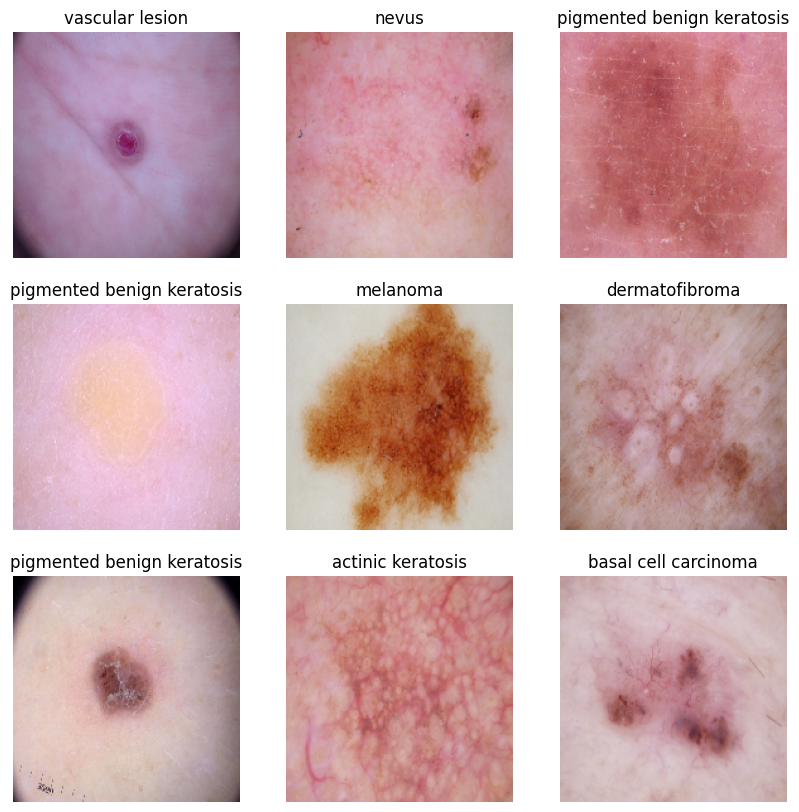

In [20]:
plot_image(train_ds)

Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


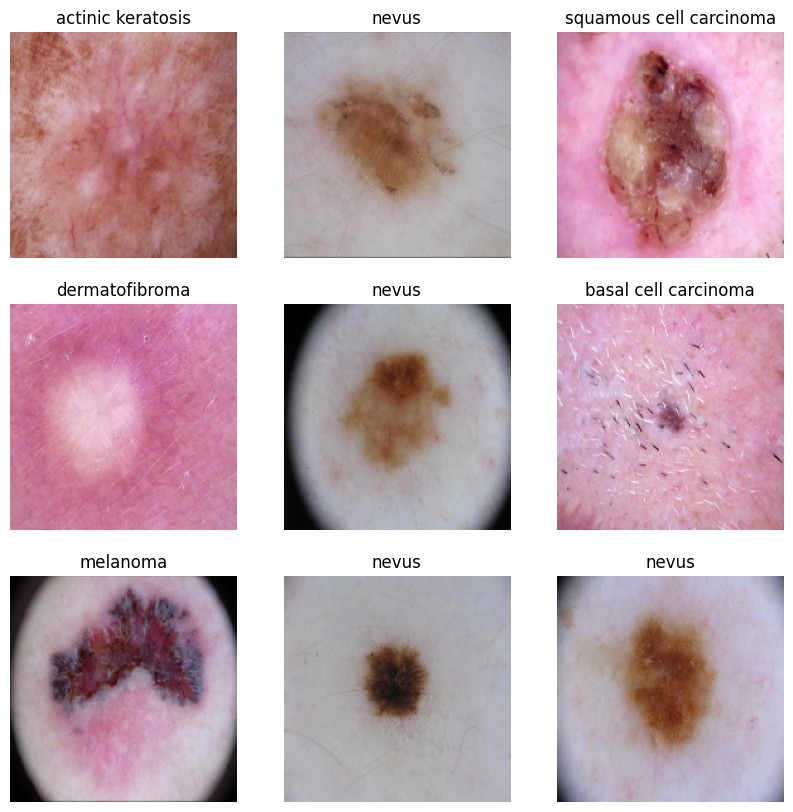

In [21]:
plot_image(val_ds)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
num_classes = 9   # Number of classes

# Define the CNN model
model = models.Sequential([
    # Input preprocessing
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Rescaling(1.0 / 255),  # Normalize pixel values

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [24]:
### choose an appropirate optimiser and loss function
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for one-hot labels
    metrics=['accuracy']
)


In [25]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      15,860,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,253,257 (62.00 MB)

 Trainable params: 16,253,257 (62.00 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [26]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 233ms/step - accuracy: 0.1823 - loss: 2.0923 - val_accuracy: 0.1864 - val_loss: 2.2505
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3517 - loss: 1.8043 - val_accuracy: 0.2373 - val_loss: 2.1378
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4318 - loss: 1.6239 - val_accuracy: 0.3390 - val_loss: 2.1520
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.4463 - loss: 1.5647 - val_accuracy: 0.3390 - val_loss: 2.1267
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5127 - loss: 1.4043 - val_accuracy: 0.3390 - val_loss: 2.1934
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5136 - loss: 1.3896 - val_accuracy: 0.3390 - val_loss: 2.0977
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5459 - loss: 1.2967 - val_accuracy: 0.3475 - val_loss: 2.2853
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5277 - loss: 1.3537 - val_accuracy: 0.2712 -

### Visualizing training results

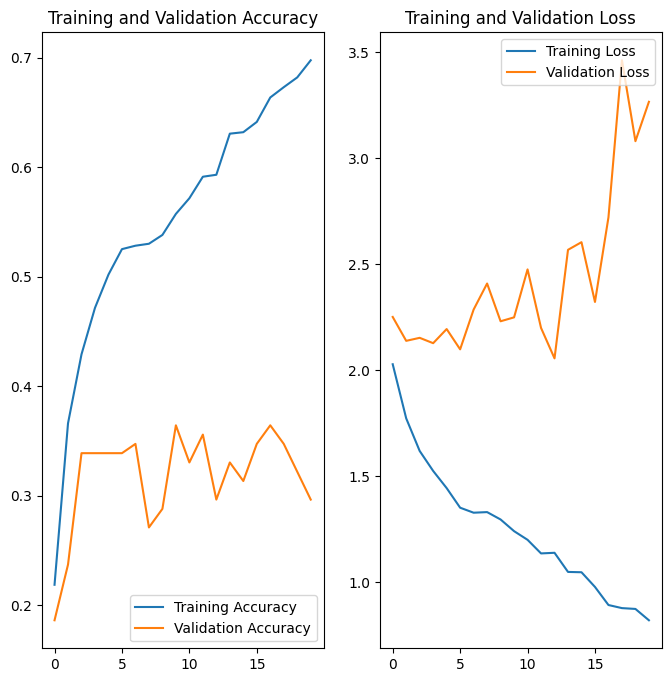

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Below are the findings based on the model
- Overfitting: The training accuracy keeps increasing while validation accuracy is not improving consistently. This could suggest the model is overfitting to the training data. We can try doing data augmentation.

- Learning Rate: The learning rate is too high

- Validation Loss Increase: The validation loss increases while training loss decreases, which often indicates the model is memorizing the training data rather than generalizing well. Regularization methods such as L2 regularization, data augmentation can be explored.



### Write your findings here

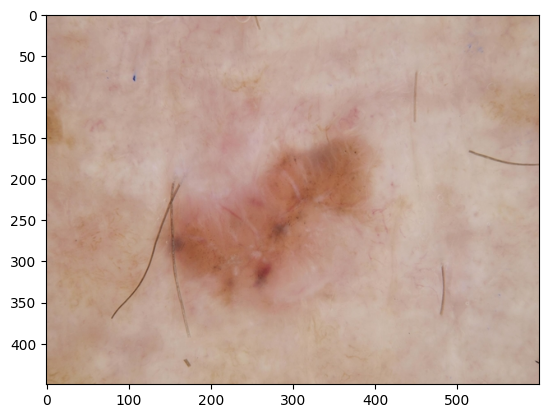

In [38]:
# Extracting a Sample Image for displaying whether augmentation is working or not.
import glob
from skimage import io
# plot a sample image
melanoma_path = os.path.join(data_dir_train, class_names[1], '*')
melanoma_path = glob.glob(melanoma_path)

# access some element (a file) from the list
image = io.imread(melanoma_path[100])
plt.imshow(image)


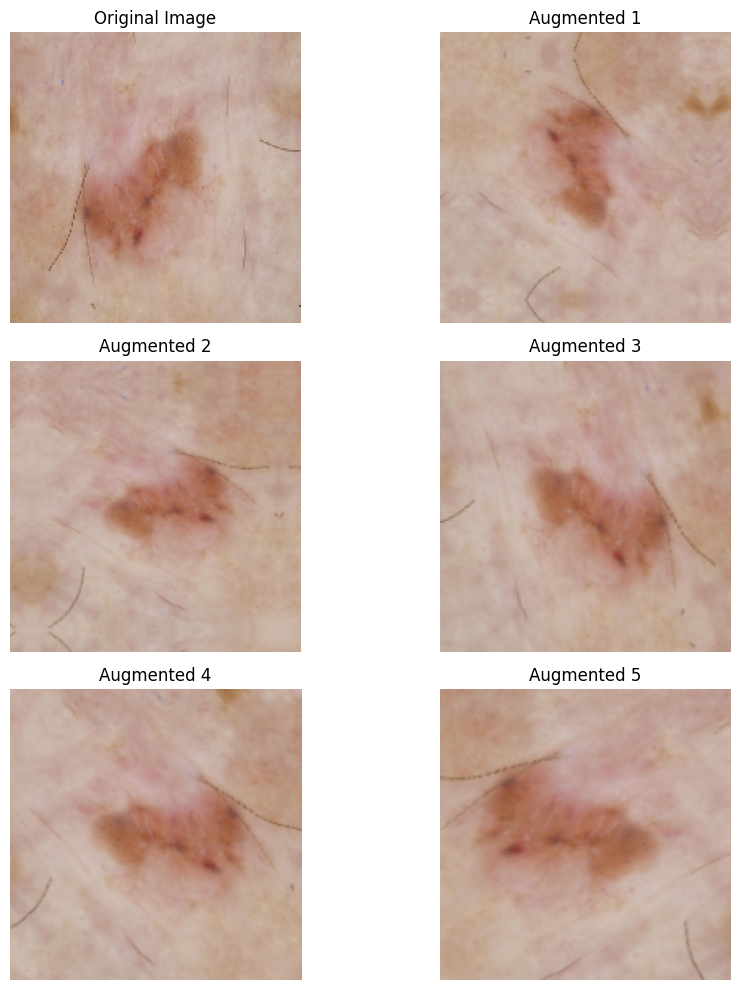

In [39]:
# As the model is overfitting, lets try adding augentation strategy
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Load one image from your dataset (assuming you have a training image path)
image_path = melanoma_path[100]  # Replace with your image path
img = image.load_img(image_path, target_size=(img_height, img_width))  # Resize the image

# Convert the image to an array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Define the augmentation model
augmentation_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Rescaling(1.0 / 255),  # Normalize pixel values
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

# Generate augmented images
augmented_images = np.array([augmentation_model(img_array) for _ in range(5)])  # 5 augmented versions

# Plot original and augmented images
plt.figure(figsize=(10, 10))

# Plot original image
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

# Plot augmented images
for i, aug_img in enumerate(augmented_images):
    plt.subplot(3, 2, i+2)
    plt.imshow(aug_img[0])  # Remove batch dimension
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Creating the model, compile and train the model with augmentation to prevent Overfitting.


In [59]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
num_classes = 9   # Number of classes

# Define the data augmentation layers
augmentation_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Rescaling(1.0 / 255),  # Normalize pixel values
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

# Define the CNN model with added improvements
model = models.Sequential([
    # Input preprocessing and augmentation
    augmentation_model,

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.6),  # Increased dropout to 0.6
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model with an adaptive learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Decrease learning rate after epoch 10

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### Compiling the model

In [60]:

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',  # Sparse categorical for integer labels
    metrics=['accuracy']
)

# Display the model summary
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 22, 22, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │      15,860,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,255,177 (62.01 MB)

 Trainable params: 16,254,217 (62.00 MB)

 Non-trainable params: 960 (3.75 KB)

### Training the model

In [61]:
## Your code goes here, note: train your model for 20 epochs
# Train the model (replace with your dataset variables)
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size)


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.2320 - loss: 20.0955 - val_accuracy: 0.1441 - val_loss: 6.5142
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.2765 - loss: 6.1290 - val_accuracy: 0.1356 - val_loss: 19.9125
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3063 - loss: 2.4467 - val_accuracy: 0.1356 - val_loss: 22.1876
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.3084 - loss: 2.3253 - val_accuracy: 0.1017 - val_loss: 13.3769
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.3479 - loss: 2.2136 - val_accuracy: 0.1610 - val_loss: 12.9392
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.3630 - loss: 2.1224 - val_accuracy: 0.1525 - val_loss: 5.7251
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.3704 - loss: 2.1163 - val_accuracy: 0.1525 - val_loss: 4.2596
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.3892 - loss: 2.0407 - val_accuracy: 0.2

### Visualizing the results

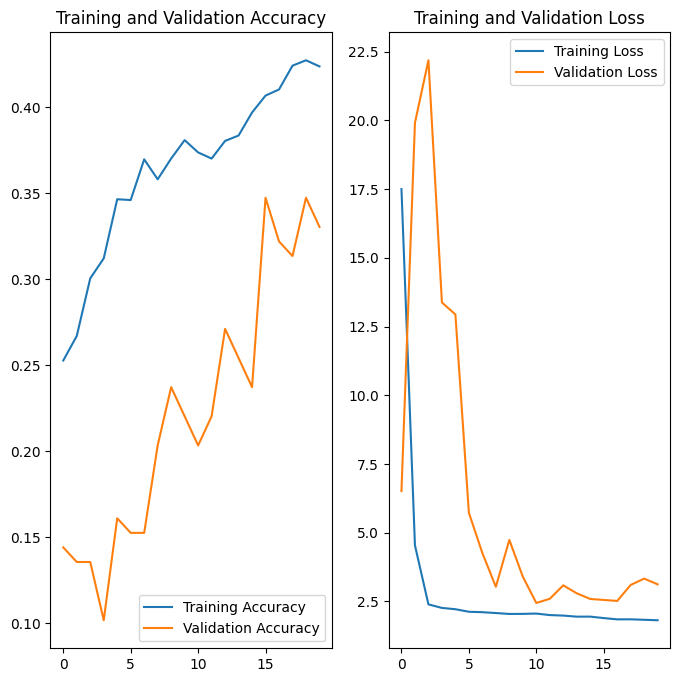

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### It seems that the model is still showing poor validation accuracy, with loss values remaining high across epochs. This might indicate a few potential issues, such as:

- Learning Rate: The learning rate could be too high, causing instability in training. You could try reducing the learning rate or adjusting the learning rate scheduler.

- Model Complexity: The current model might be too complex for the dataset, or there might be overfitting happening. Using simpler models or adding more regularization might help.

- Data Augmentation: While data augmentation is generally helpful, excessive augmentation can sometimes confuse the model, especially if the augmentation parameters are too aggressive for the type of data.


#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [65]:
import os
import pandas as pd
from pathlib import Path
from collections import Counter

# Get all image file paths and their corresponding labels
paths = list(Path(data_dir_train).glob('*/*.jpg'))
labels = [os.path.basename(os.path.dirname(p)) for p in paths]

# Create a dataframe of paths and labels
df = pd.DataFrame(list(zip(paths, labels)), columns=["Path", "Label"])

import pandas as pd

# Calculate the proportion of each class
class_proportion = df['Label'].value_counts(normalize=True)

# Print class distribution and proportions
print("Class Distribution (Number of Samples):")
print(class_distribution)

print("\nClass Proportions (Proportion of Total Samples):")
print(class_proportion)

# Find the class with the highest number of samples
most_dominant_class = class_distribution.idxmax()
most_dominant_class_samples = class_distribution.max()

# Find the class with the lowest number of samples
least_dominant_class = class_distribution.idxmin()
least_dominant_class_samples = class_distribution.min()

print(f"\nMost Dominant Class: {most_dominant_class} with {most_dominant_class_samples} samples")
print(f"Least Dominant Class: {least_dominant_class} with {least_dominant_class_samples} samples")



Class Distribution (Number of Samples):
Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

Class Proportions (Proportion of Total Samples):
Label
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
Name: proportion, dtype: float64

Most Dominant Class: pigmented benign keratosis with 462 samples
Least Dominant Class: seborrheic keratosis with 77 samples


#### Class based samples
- Most Dominant Class: pigmented benign keratosis with 462 samples
- Least Dominant Class: seborrheic keratosis with 77 samples


#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [66]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [68]:
path_to_training_dataset= data_dir_train
import Augmentor
for i in class_names:
    augmented_path = os.path.join(path_to_training_dataset, i)
    p = Augmentor.Pipeline(augmented_path)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF5AA2CE530>: 100%|██████████| 500/500 [00:14<00:00, 33.95 Samples/s]


Initialised with 376 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF6141D3940>: 100%|██████████| 500/500 [00:15<00:00, 32.90 Samples/s]


Initialised with 95 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DF5AA6CFFA0>: 100%|██████████| 500/500 [00:15<00:00, 32.57 Samples/s]


Initialised with 438 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7DF544AB5030>: 100%|██████████| 500/500 [01:16<00:00,  6.50 Samples/s]


Initialised with 357 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7DF5AA1BB040>: 100%|██████████| 500/500 [01:23<00:00,  6.02 Samples/s]


Initialised with 462 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF54414FE80>: 100%|██████████| 500/500 [00:14<00:00, 33.50 Samples/s]


Initialised with 77 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DF6141D1AE0>: 100%|██████████| 500/500 [00:36<00:00, 13.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DF5AA1BA2C0>: 100%|██████████| 500/500 [00:15<00:00, 32.77 Samples/s]


Initialised with 139 image(s) found.
Output directory set to extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF636B67610>: 100%|██████████| 500/500 [00:15<00:00, 33.24 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [72]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [81]:
import glob # Already imported but included for clarity
import os

# Use glob.glob() to call the function within the glob module
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0032897.jpg_cfa5704e-a8bf-4708-9d90-8e83a2359edb.jpg',
 'extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025696.jpg_24042c7f-8b59-4489-afb9-c806fe8ddbf2.jpg',
 'extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0029860.jpg_d57ff30f-f373-440c-a58c-02ccff273bd3.jpg',
 'extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027184.jpg_2b462967-7611-4c67-87c2-7db9a34b328b.jpg',
 'extracted_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_

In [78]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [82]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [84]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [85]:
new_df['Label'].value_counts()

,count
Label,
squamous cell carcinoma,500
dermatofibroma,500
seborrheic keratosis,500
vascular lesion,500
melanoma,500
actinic keratosis,500
nevus,500
pigmented benign keratosis,500
basal cell carcinoma,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [86]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [88]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [90]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


#### Create your model (make sure to include normalization)

In [97]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
num_classes = 9   # Number of classes

# Define the CNN model
model = models.Sequential([
    # Input preprocessing
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Rescaling(1.0 / 255),  # Normalize pixel values

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

#### Compile your model (Choose optimizer and loss function appropriately)

In [98]:
# Compile the model with an adaptive learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train your model

In [99]:
## Your code goes here, note: train your model for 20 epochs
# Train the model (replace with your dataset variables)
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.2056 - loss: 2.1052 - val_accuracy: 0.1304 - val_loss: 2.6713
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 136ms/step - accuracy: 0.3833 - loss: 1.6214 - val_accuracy: 0.1739 - val_loss: 1.8993
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.4504 - loss: 1.4251 - val_accuracy: 0.2174 - val_loss: 2.2665
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.4973 - loss: 1.2977 - val_accuracy: 0.1739 - val_loss: 2.2962
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - accuracy: 0.5338 - loss: 1.1960 - val_accuracy: 0.2609 - val_loss: 1.9564
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.5808 - loss: 1.0925 - val_accuracy: 0.2609 - val_loss: 2.5641
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 141ms/step - accuracy: 0.6260 - loss: 0.9870 - val_accuracy: 0.2609 - val_loss: 2.7594
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 131ms/step - accuracy: 0.6824 - loss: 0

#### Visualize the model results

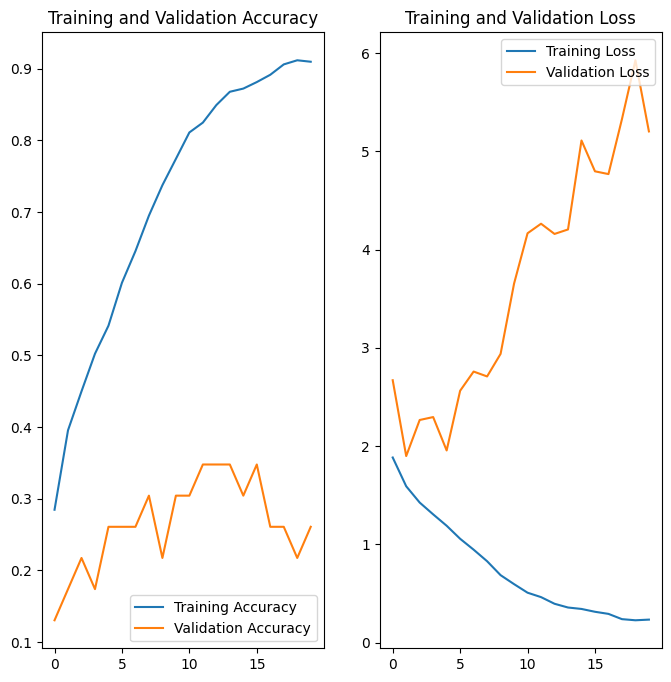

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Alayzing whether the class rebalance helped or not.



- Overfitting: The model is fitting the training data well, but the validation accuracy doesn't improve significantly. This is a sign of overfitting, where the model performs well on the training data but struggles on validation data.
- Class Imbalance: Although the classes were balanced using data augmentation, the model might still be biased toward certain classes, especially if the dataset contains noisy or difficult-to-learn examples.